#### Question 1 : 

$\alpha$ modélise la croissance de la population de proies par reproduction, $\beta$ modélise la prédation des proies par les prédateurs qui fait diminuer la population de proies, $\gamma$ modélise le fait qu'une population excessive de prédateurs entraine le déclin de cette espèce, et $\delta$ représente à l'inverse le fait que l'abondance de proies favorise la croissance de la population de prédateurs.  
Les points d'équilibres sont les solutions du système :   
$$
\left\lbrace
\begin{array}{ccc}
\dot x_1=0\\
\dot x_2=0\\
\end{array}\right.
$$  
que l'on résout aisément ce qui donne les deux points d'équilibre:
$
\begin{pmatrix}
0\\[3mm]
0\\[3mm]
\end{pmatrix}
$ et 
$
\begin{pmatrix}
\frac{\gamma}{\delta}\\[3mm]
\frac{\alpha}{\beta}\\[3mm]
\end{pmatrix}
$.  
On peut utiliser le théorème liant la stabilité des points d'équilibre à la stabilité du linéarisé tangeant: on commence par calculer  
$$
J_f(x_1,x_2) = 
\begin{pmatrix}
\alpha - \beta x_2 & -\beta x_1 \\
\delta x_2 & -(\gamma - \delta x_1) \\
\end{pmatrix}
$$  
en $(0,0)$ on obtient donc la matrice $\begin{pmatrix}
\alpha & 0 \\
0 & -\gamma \\
\end{pmatrix}$
qui a pour valeur propre $\alpha>0$ : ainsi ce point d'équilibre est instable.  
Au deuxième point d'équilibre, on obtient la matrice $\begin{pmatrix}
0 & \beta \frac{\gamma}{\delta} \\
\delta \frac{\alpha}{\beta} & 0 \\
\end{pmatrix}$ , dont on calcule les valeurs propres qui sont: $\pm i \sqrt{\alpha \gamma}$ . Les parties réelles des valeurs propres étant nulles, on est dans le cas où le théorème ne donne pas d'informations: on ne sait donc a priori rien de la stabilité de ce point d'équilibre.

  
    





In [1]:
import autograd
import autograd.numpy as np

# Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10] # [width, height] (inches). 

# Jupyter & IPython
from IPython.display import display
from math import floor, exp, log

param(alpha, beta, gamma, delta)


In [2]:
param = [1,1,1,1]

In [3]:
def f(x, *t) :
    return np.array([x[0]*(param[0] - param[1]*x[1]), -x[1]*(param[2] - param[3]*x[0])])

#### Question 2 :


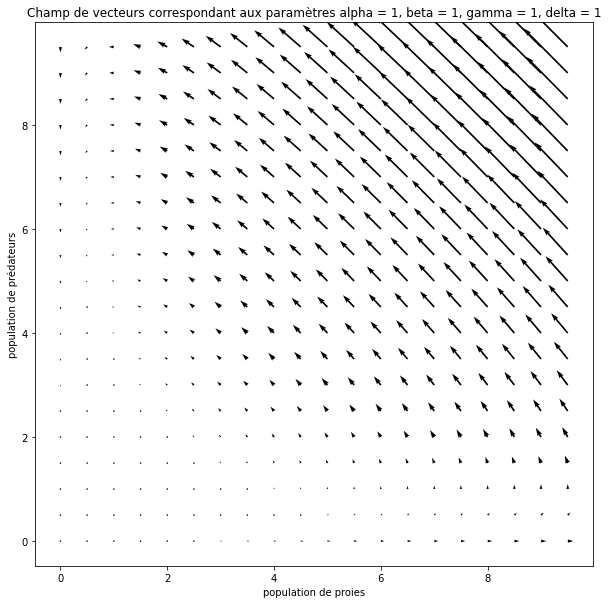

In [4]:
def champ_de_vecteurs(f, x1_min, x1_max, x2_min, x2_max, pas):
    arange1 = np.arange(x1_min, x1_max, pas)
    arange2 = np.arange(x2_min, x2_max, pas)
    X1, X2 = np.meshgrid(arange1, arange2)
        
    plt.quiver(X1,X2, f([X1,X2])[0], f([X1, X2])[1])
    plt.title(f'Champ de vecteurs correspondant aux paramètres alpha = {param[0]}, beta = {param[1]}, gamma = {param[2]}, delta = {param[3]}')
    plt.xlabel('population de proies')
    plt.ylabel('population de prédateurs')
    plt.show()
    
champ_de_vecteurs(f, 0, 10, 0, 10, 0.5)
    

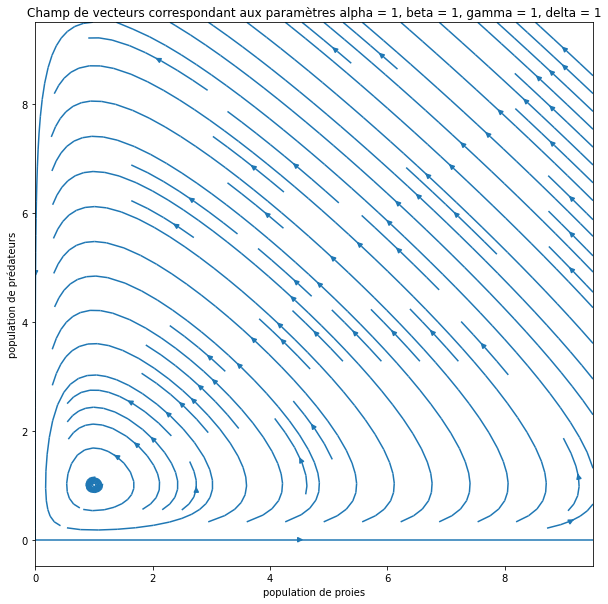

In [5]:
def portrait_de_phase(f, x1_min, x1_max, x2_min, x2_max, pas):
    arange1 = np.arange(x1_min, x1_max, pas)
    arange2 = np.arange(x2_min, x2_max, pas)
    X1, X2 = np.meshgrid(arange1, arange2)
        
    plt.streamplot(X1,X2, f([X1,X2])[0], f([X1, X2])[1])
    plt.title(f'Champ de vecteurs correspondant aux paramètres alpha = {param[0]}, beta = {param[1]}, gamma = {param[2]}, delta = {param[3]}')
    plt.xlabel('population de proies')
    plt.ylabel('population de prédateurs')
    plt.show()
    
portrait_de_phase(f, 0, 10, 0, 10, 0.5)

Les solutions semblent être cycliques. Le cycle décrit part d'une situation sans trop de prédateurs favorisant le développement des proies. Face au grand nombre de proies, le développement des prédateurs se voit favoriser ce qui implique une baisse de la population de proies. Les prédateurs, ainsi privés de leur source d'alimentation voient progressivement leur population décliner jusqu'à retrouver la situation initiale. 

#### Question 3

la fonction $f:(x_1,x_2) \mapsto (x_1(\alpha - \beta x_2 ),-x_2 (\gamma - \delta x_1) )$ étant continue et continument différentiable, car les coefficients de sa jacobienne sont polynomiaux en les $x_i$, le théorème de Cauchy-Lipschitz nous indique que pour tout $(t_0,x_10,x_20)$ il existe une unique solution maximale $(x_1,x_2)$ défini sur un intervalle ouvert de temps de longueur non nulle qui reste dans le domaine de définition de f, qui est $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$.

#### Question 4
Calculons 
$$
\dot H = \delta \dot x_1 - \gamma \frac{\dot x_1}{x_1} + \beta \dot x_2 - \alpha \frac{\dot x_2}{x_2}
$$
en utilisant les équations de Lotka-Volterra, on obtient:
$$
\dot H = (\delta x_1 - \gamma )( \alpha - \beta x_2 ) - ( \gamma - \delta x_1 )(\beta x_2 - \alpha )
$$
en développant, on obtient finalement: 
$$
\dot H = 0
$$  
Ainsi, une solution $x$ initialisée en $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$ décrit une portion d'une courbe de niveau de H de valeur finie $H(\bar x)$. De plus, le théorème traitant du domaine maximal d'existence indique que cette solution n'est pas définie sur $\mathbb{R}$ si à un instant $t$, elle explose, ou se rapproche de la frontière du domaine de définition de $f$.  
Si elle explose, alors la valeur de H explose elle aussi: en effet, si $||x|| \rightarrow +\infty$, alors $x_1 \rightarrow +\infty$ ou $x_2 \rightarrow +\infty$, et $H \rightarrow +\infty$; et si elle se rapproche de la frontière, alors $x_1 \rightarrow 0^+$ ou $x_2 \rightarrow 0^+$, et $H \rightarrow +\infty$.  
Dans les deux cas, la solution dévie donc forcément de la courbe de niveau de $H$, ce qui est absurde: ainsi, cette solution est bien définie sur $\mathbb{R}$ tout entier.  
  
Par ailleurs, la stabilité de $\bar x$ est assurée par la caractérisation par Lyapunov: $H$ est alors considérée comme une fonction de Lyapunov, de dérivée temporelle nulle, ce qui assure la stabilité de $\bar x $ . A REVOIR.

In [6]:
def H(x):
    x0 = np.array(x[0])
    x1 = np.array(x[1])
    return param[3]*x0 - param[2]*np.log(x0) + param[1]*x1 - param[0]*np.log(x1)



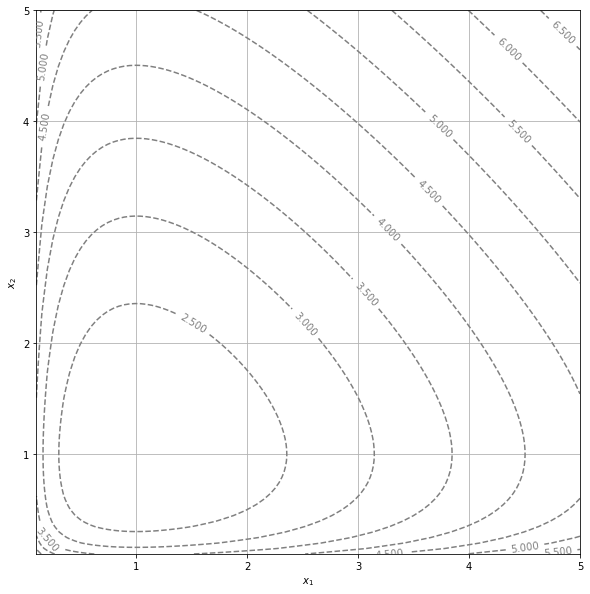

In [7]:
def display_contour(x, y, levels):
    X1, X2 = np.meshgrid(x, y)
    Z = H(np.array([X1, X2]))
    fig, ax = plt.subplots()
    contour_set = plt.contour(X1, X2, Z, colors="grey", linestyles="dashed", levels=levels)
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

display_contour(np.linspace(0.1, 5.0, 100), np.linspace(0.1, 5.0, 100), 10)

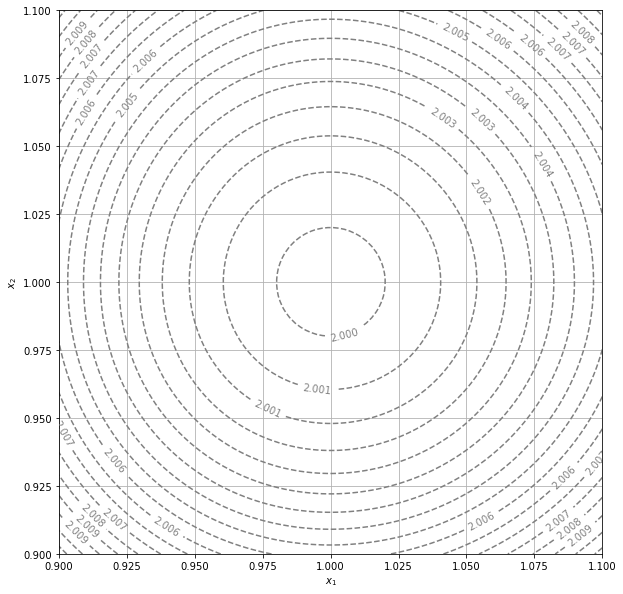

In [8]:
display_contour(np.linspace(param[2]/param[3] - 0.1, param[2]/param[3] + 0.1, 100), np.linspace(param[0]/param[1] - 0.1, param[0]/param[1] + 0.1, 100),   20)

On retrouve bien le point d'équilibre X aux coordonnées ($\gamma$/delta, alpha/beta)
Cf calcul de H --> Mouvement conservatif
stable -->  les courbes de niveaux se resserrent autour du point d'équilibre, les solutions restent arbitrairement proche.

#### Question 6

In [9]:
def euler_explicite(f, x0, t0, tf, dt) :
    nombre = floor((tf-t0)/dt) + 1
    forme = np.shape(x0)[0]
    T = np.linspace(t0, tf, nombre)
    x = np.zeros(shape = (nombre, forme))
    x[0] = x0 
    for i in range(1, len(T)):
        x[i] = x[i-1] + dt*f(x[i-1], T[i-1])
    return T, x
        
        
        

In [10]:
def g(x, *t) :
    return x 

In [11]:
def expo(dx,x0,xf):
    nombre = floor((xf-x0)/dx)+1
    absi = np.linspace(x0, xf, nombre)
    ordi = []
    for elem in absi :
        ordi.append(exp(elem))
    return absi, ordi

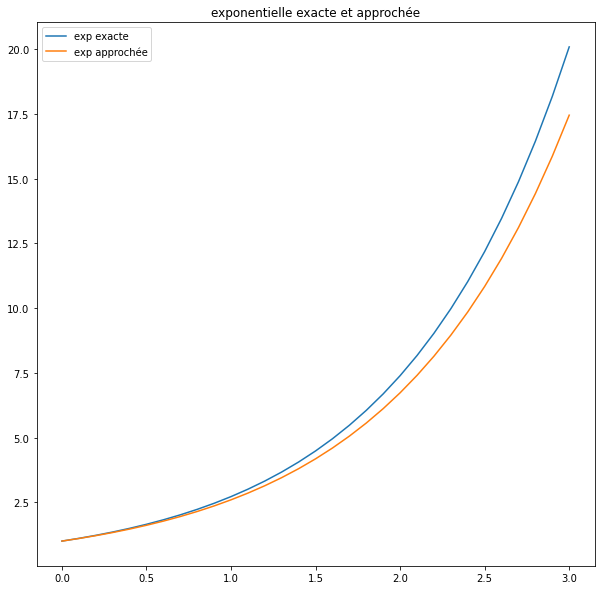

In [12]:
plt.title(f'exponentielle exacte et approchée')
A = euler_explicite(g, np.array([1]), 0, 3, 0.1)
plt.plot(expo(0.1, 0, 3)[0], expo(0.1, 0, 3)[1], label = 'exp exacte')
plt.plot(A[0], A[1], label = 'exp approchée')
plt.legend()
plt.show()

On s'assure de la convergence du schéma quand le pas tend vers 0 :

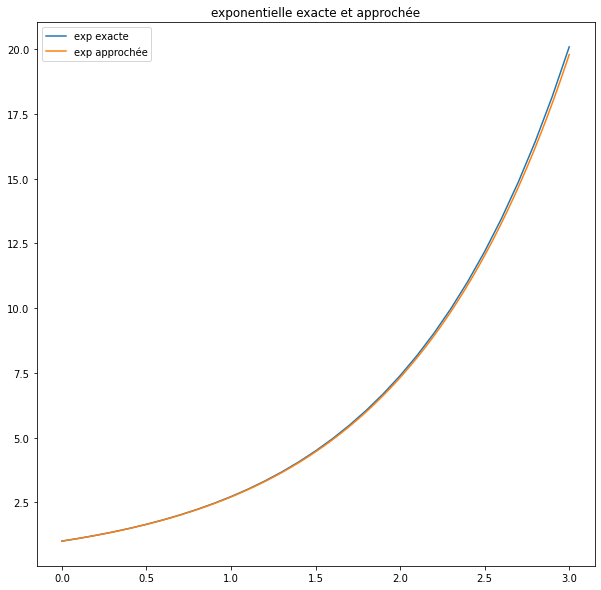

In [13]:
plt.title('exponentielle exacte et approchée')
plt.plot(expo(0.1, 0, 3)[0], expo(0.1, 0, 3)[1], label = 'exp exacte')
A = euler_explicite(g, np.array([1]), 0, 3, 0.01)
plt.plot(A[0], A[1], label = 'exp approchée')
plt.legend()
plt.show()

Pour déterminer l'ordre de convergence de la méthode on trace $ln(x^j - x(t_j))$ en fonction de $ln(dt)$ et on détermine la pente :


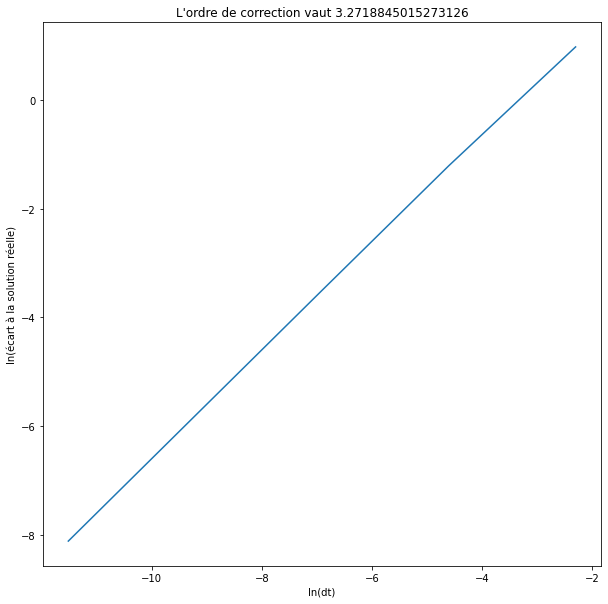

In [14]:

def ordre_de_correction(x0, t0, tf) :
    DT = np.array([10**(-5+i)for i in range (5)])
    ecart = np.array([abs(euler_explicite(g, x0, t0, tf, dt)[1][-1] - exp(tf)) for dt in DT])
    pente = log((ecart[-1]-ecart[0])/(DT[-1] - DT[0]))
    return np.log(DT), np.log(ecart), pente
  
   
    
A = ordre_de_correction(np.array([1]), 0, 3)
plt.plot(A[0],A[1])
plt.title( f"L'ordre de correction vaut {A[2]}")
plt.xlabel('ln(dt)')
plt.ylabel('ln(écart à la solution réelle)')
plt.show()





#### Question 7

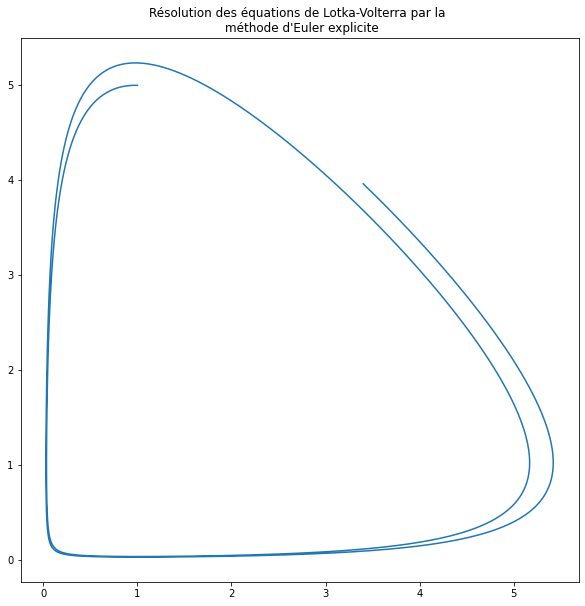

In [15]:

def tracé(tab) :
    X1 = np.array([elem[0] for elem in tab[1]])
    X2 = np.array([elem[1] for elem in tab[1]])
    return X1, X2

A = tracé(euler_explicite(f, np.array([1,5]), 2, 20, 0.01))
plt.title("Résolution des équations de Lotka-Volterra par la \n méthode d'Euler explicite")
plt.plot(A[0], A[1])

On constate qu'au temps long, l'erreur de calcul de la méthode d'Euler explicite devient importante et dévie la trajectoire. On change alors de courbes de niveau de H. Alors que la solution exacte devrait boucler.

On trace l'évolution de la fonction H en fonction du temps et avec les valeurs de $x_1 et x_2$ déterminée par la méthode d'Euler explicite. Rappelons que la solution exacte nous donne que H est constante.

In [16]:
def evolution_H(tab):
    T = tab[0]
    Value = np.array([H(elem) for elem in tab[1]])
    return T, Value

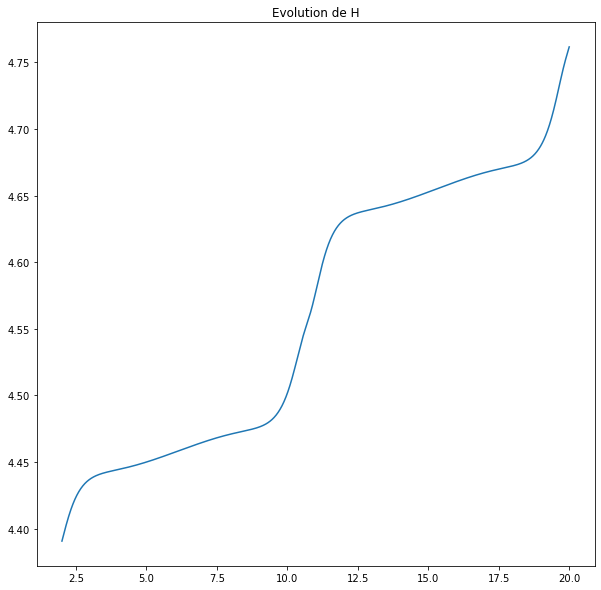

In [17]:
Curve = evolution_H(euler_explicite(f, np.array([1,5]), 2, 20, 0.01))
plt.plot(Curve[0], Curve[1])
plt.title('Evolution de H')
plt.show()

On voit donc bien comment la trajectoire dérive progressivement des lignes de niveau de H.

#### Question 8 

On inmplémente la méthode de Newton qui nous permettra de déterminer les valeurs de $x_1^{j+1}$  et de $x_2^{j+1}$ nécessaire au fonctionnement de la méthode d'Euler implicite :

In [18]:
def grad(f):
    g = autograd.grad
    def grad_f(x, y):
        return np.array([g(f, 0)(x, y), g(f, 1)(x, y)])
    return grad_f

In [82]:
def J(f):
    j = autograd.jacobian
    def J_f(x, y):
        return np.array([j(f, 0)(x, y), j(f, 1)(x, y)]).T
    return J_f

In [80]:
def Newton(F, x0, y0, eps=0.003, N=100):
    for i in range(N):
        a = np.array([x0, y0]) - np.linalg.inv(J(F)(x0, y0))@F(x0, y0)
        xn, yn = a[0], a[1]
        if np.sqrt((xn - x0)**2 + (yn - y0)**2) <= eps:
            return np.array([xn, yn])
        x0, y0 = xn, yn
    else:
        raise ValueError(f"no convergence in {N} steps.")

In [168]:
def f_for_Newton(x,y):
    return   np.array([x, y]) - init - np.array([x*(param[0]- param[1]*y), -y*(param[2] - param[3]*x)])

In [177]:
init = 0

In [175]:
def solve_euler_implicit(f, x0, t0, tf, dt, itermax) :
    nombre = floor((tf-t0)/dt) + 1
    forme = np.shape(x0)[0]
    T = np.linspace(t0, tf, nombre)
    x = np.zeros(shape = (nombre, forme))
    x[0] = x0 
    global init 
    for i in range(1, len(T)) :
        init = x[i-1]
        x[i] = Newton(f_for_Newton, 3.0,3.0, 10**-8, itermax)
    return T, x

In [176]:
init


array([1., 1.])

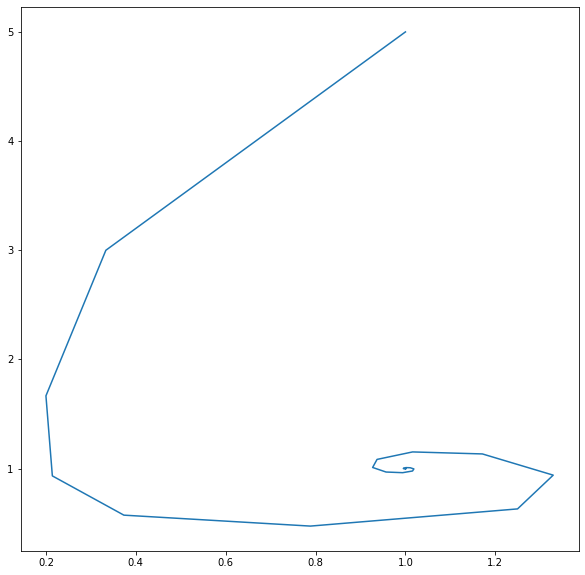

In [178]:

A = solve_euler_implicit(f_for_Newton,np.array([1.0,5.0]), 2, 20, 0.01, 100)
B = tracé(A)
plt.plot(B[0], B[1])


